In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


data = pd.read_csv("performance.csv")
df=pd.DataFrame(data)

print(df)

df.isnull().sum()

     percentage educational_resources parents_education  personality passion  \
0          85.0                  good          graduate  extroverted     yes   
1          78.0          satisfactory     undergraduate   ambiverted      no   
2          92.0                  poor               PhD  introverted     yes   
3          87.0                  good          graduate  extroverted      no   
4          80.0          satisfactory     undergraduate   ambiverted     yes   
..          ...                   ...               ...          ...     ...   
744        78.0          satisfactory          graduate  introverted     yes   
745        89.0                  good          graduate  extroverted     yes   
746        85.5                  good     undergraduate  introverted     yes   
747        78.0          satisfactory           below10  extroverted      no   
748        88.0                  good          graduate  extroverted     yes   

     ott_time  sm_time  travel_time  ed

percentage               0
educational_resources    0
parents_education        0
personality              0
passion                  0
ott_time                 0
sm_time                  0
travel_time              0
eduvids_time             0
game_time                0
extra_time               0
ai_usage                 0
dtype: int64

In [2]:
null_values=df.isnull()
print(null_values)

total_null_values=df.isnull().sum()
print(total_null_values)


     percentage  educational_resources  parents_education  personality  \
0         False                  False              False        False   
1         False                  False              False        False   
2         False                  False              False        False   
3         False                  False              False        False   
4         False                  False              False        False   
..          ...                    ...                ...          ...   
744       False                  False              False        False   
745       False                  False              False        False   
746       False                  False              False        False   
747       False                  False              False        False   
748       False                  False              False        False   

     passion  ott_time  sm_time  travel_time  eduvids_time  game_time  \
0      False     False    False       

In [3]:
# Map educational_resources values to numerical representations
# convert categorical variable to numerical
df['passion'] = df['passion'].apply(lambda x: 1 if x =='yes' else 0)
print(df)


     percentage educational_resources parents_education  personality  passion  \
0          85.0                  good          graduate  extroverted        1   
1          78.0          satisfactory     undergraduate   ambiverted        0   
2          92.0                  poor               PhD  introverted        1   
3          87.0                  good          graduate  extroverted        0   
4          80.0          satisfactory     undergraduate   ambiverted        1   
..          ...                   ...               ...          ...      ...   
744        78.0          satisfactory          graduate  introverted        1   
745        89.0                  good          graduate  extroverted        1   
746        85.5                  good     undergraduate  introverted        1   
747        78.0          satisfactory           below10  extroverted        0   
748        88.0                  good          graduate  extroverted        1   

     ott_time  sm_time  tra

In [4]:
mapping_dict1 = {'good': 1, 'poor': 0.01, 'satisfactory': 0.5}

# Apply the mapping to the DataFrame column
df['educational_resources'] = df['educational_resources'].map(mapping_dict1)


mapping_dict2 = {'extroverted': 0.01, 'introverted': 1, 'ambiverted': 0.5}

In [5]:
# Apply the mapping to the DataFrame column
df['personality'] = df['personality'].map(mapping_dict2)

mapping_dict3 = {'regular': 0.01, 'never': 1, 'occasional': 0.5}

# Apply the mapping to the DataFrame column
df['ai_usage'] = df['ai_usage'].map(mapping_dict3)

mapping_dict4 = {'below10': 0.20, '10': 0.22, '12': 0.25, 'undergraduate': 0.5, 'graduate': 0.65, 'PhD': 0.75}

In [7]:
# Apply the mapping to the DataFrame column
df['parents_education'] = df['parents_education'].map(mapping_dict4)

df['study_time'] = 9-df['ott_time']-df['sm_time']-df['travel_time']+df['eduvids_time']-df['game_time']-df['extra_time']+df['passion']*2-df['ai_usage']*2+df['personality']+df['parents_education']

# Print the modified DataFrame
print(df)


     percentage  educational_resources  parents_education  personality  \
0          85.0                   1.00               0.65         0.01   
1          78.0                   0.50               0.50         0.50   
2          92.0                   0.01               0.75         1.00   
3          87.0                   1.00               0.65         0.01   
4          80.0                   0.50               0.50         0.50   
..          ...                    ...                ...          ...   
744        78.0                   0.50               0.65         1.00   
745        89.0                   1.00               0.65         0.01   
746        85.5                   1.00               0.50         1.00   
747        78.0                   0.50               0.20         0.01   
748        88.0                   1.00               0.65         0.01   

     passion  ott_time  sm_time  travel_time  eduvids_time  game_time  \
0          1       2.0      1.0       

     percentage  educational_resources  parents_education  personality  \
0          85.0                   1.00               0.65         0.01   
1          78.0                   0.50               0.50         0.50   
2          92.0                   0.01               0.75         1.00   
3          87.0                   1.00               0.65         0.01   
4          80.0                   0.50               0.50         0.50   
..          ...                    ...                ...          ...   
744        78.0                   0.50               0.65         1.00   
745        89.0                   1.00               0.65         0.01   
746        85.5                   1.00               0.50         1.00   
747        78.0                   0.50               0.20         0.01   
748        88.0                   1.00               0.65         0.01   

     passion  ott_time  sm_time  travel_time  eduvids_time  game_time  \
0          1       2.0      1.0       

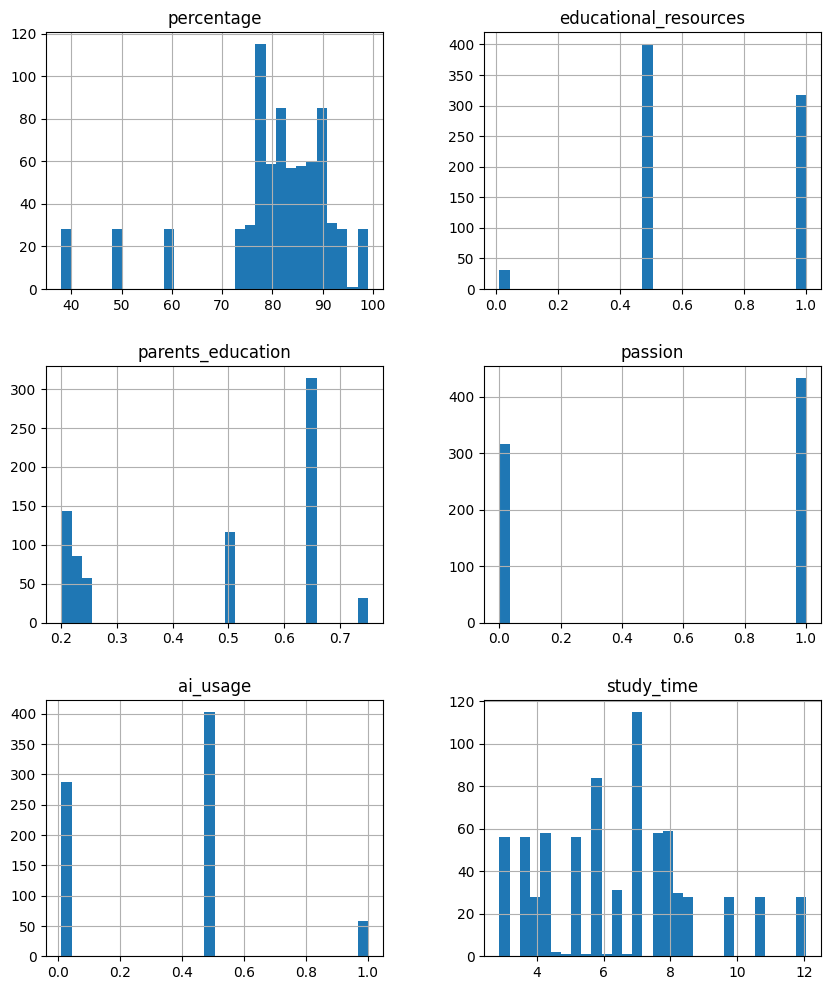

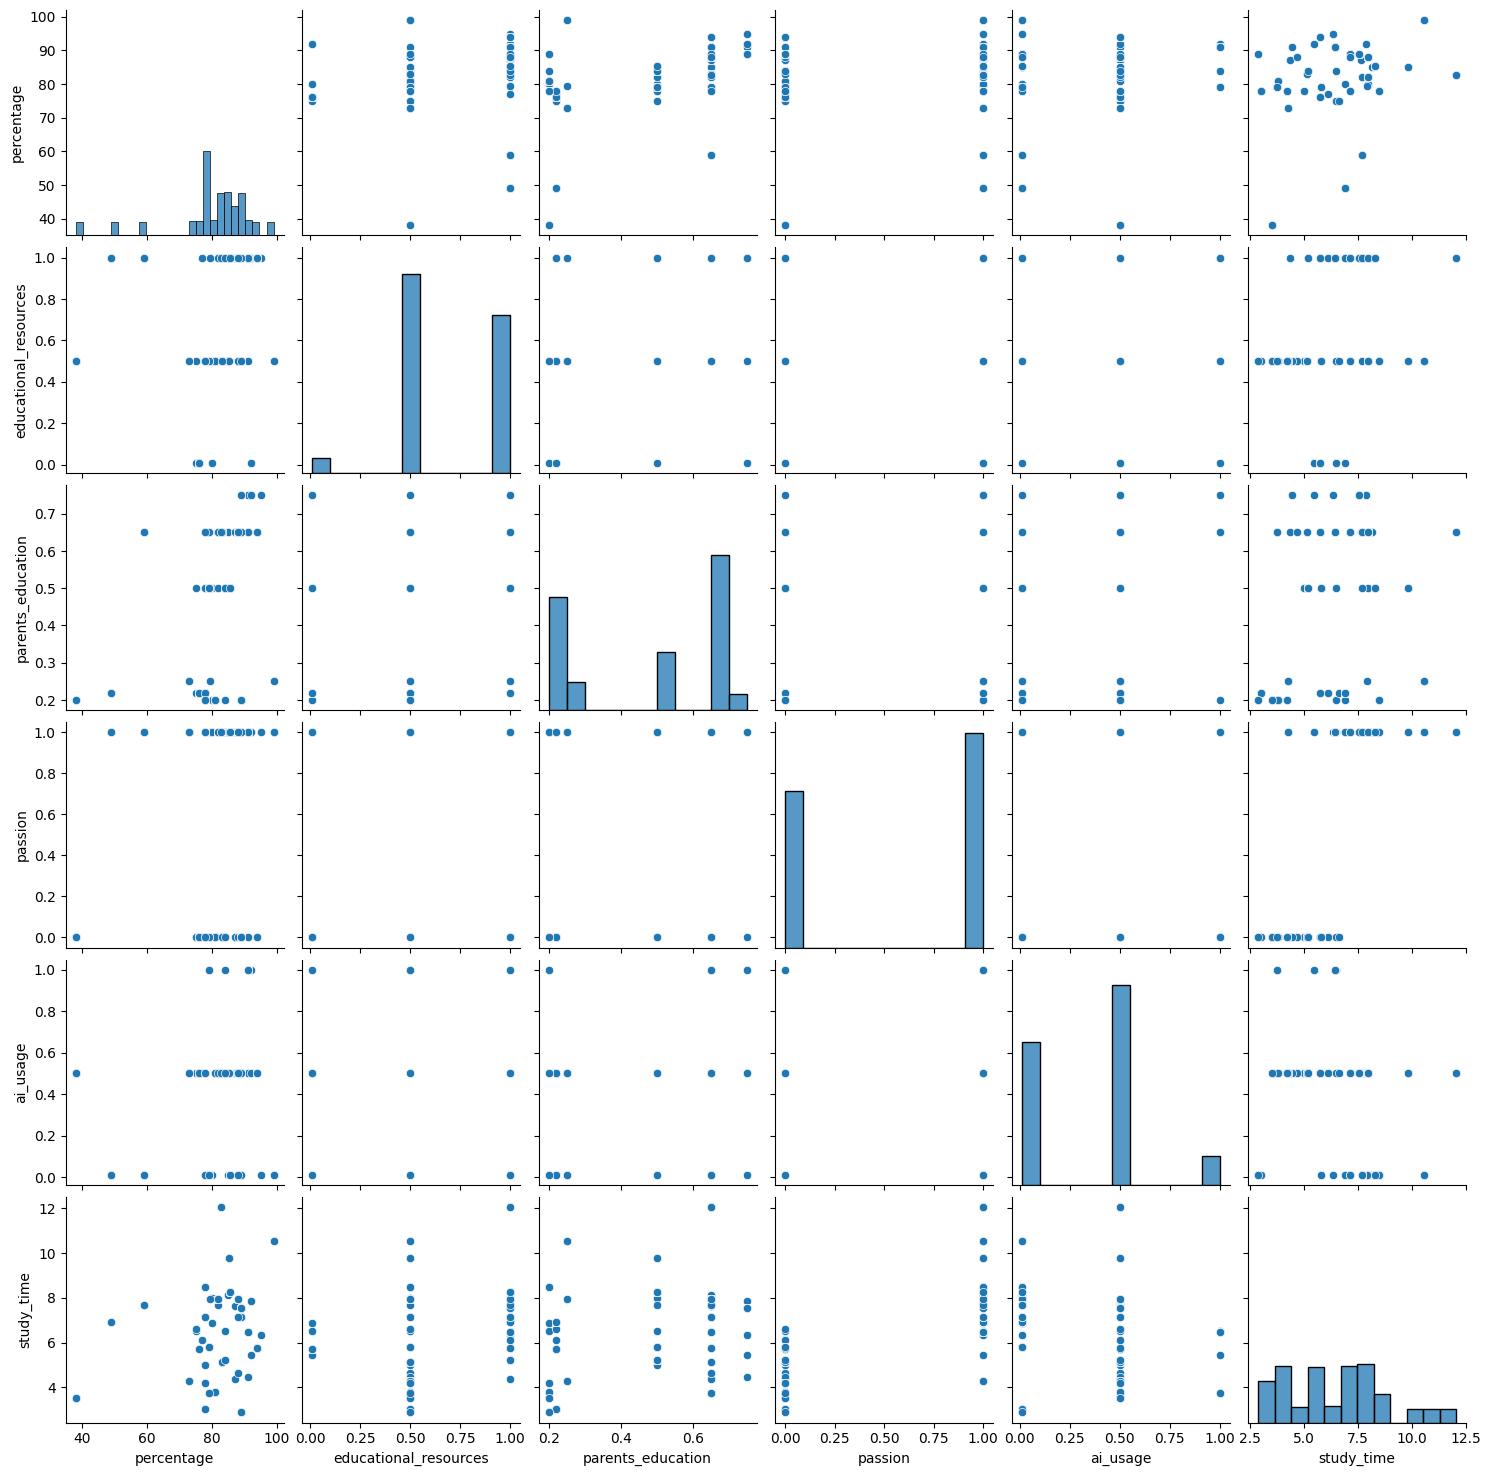

In [8]:
# Print the modified DataFrame
print(df)

import matplotlib.pyplot as plt
df[  ['percentage', 'educational_resources', 'parents_education', 'passion', 'ai_usage', 'study_time']].hist(bins=30, figsize=(10,12))

import seaborn as sns
# plot pairplot
sns.pairplot(df[  ['percentage', 'educational_resources', 'parents_education', 'passion', 'ai_usage', 'study_time']])

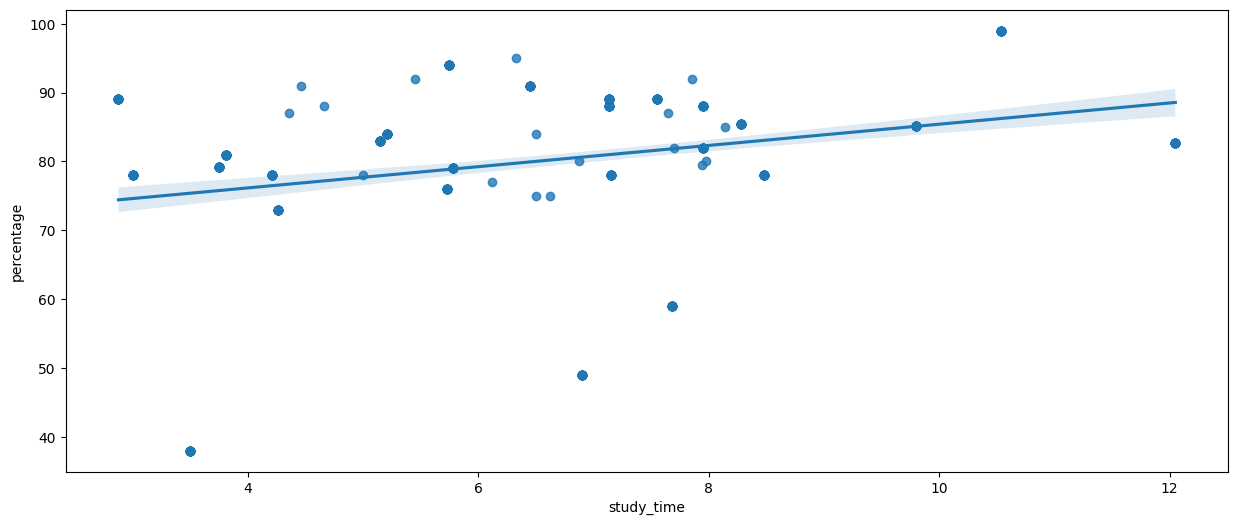

     educational_resources  parents_education  personality  passion  ott_time  \
0                     1.00               0.65         0.01        1       2.0   
1                     0.50               0.50         0.50        0       1.5   
2                     0.01               0.75         1.00        1       3.0   
3                     1.00               0.65         0.01        0       2.0   
4                     0.50               0.50         0.50        1       2.5   
..                     ...                ...          ...      ...       ...   
744                   0.50               0.65         1.00        1       2.5   
745                   1.00               0.65         0.01        1       3.0   
746                   1.00               0.50         1.00        1       2.0   
747                   0.50               0.20         0.01        0       2.5   
748                   1.00               0.65         0.01        1       3.0   

     sm_time  travel_time  

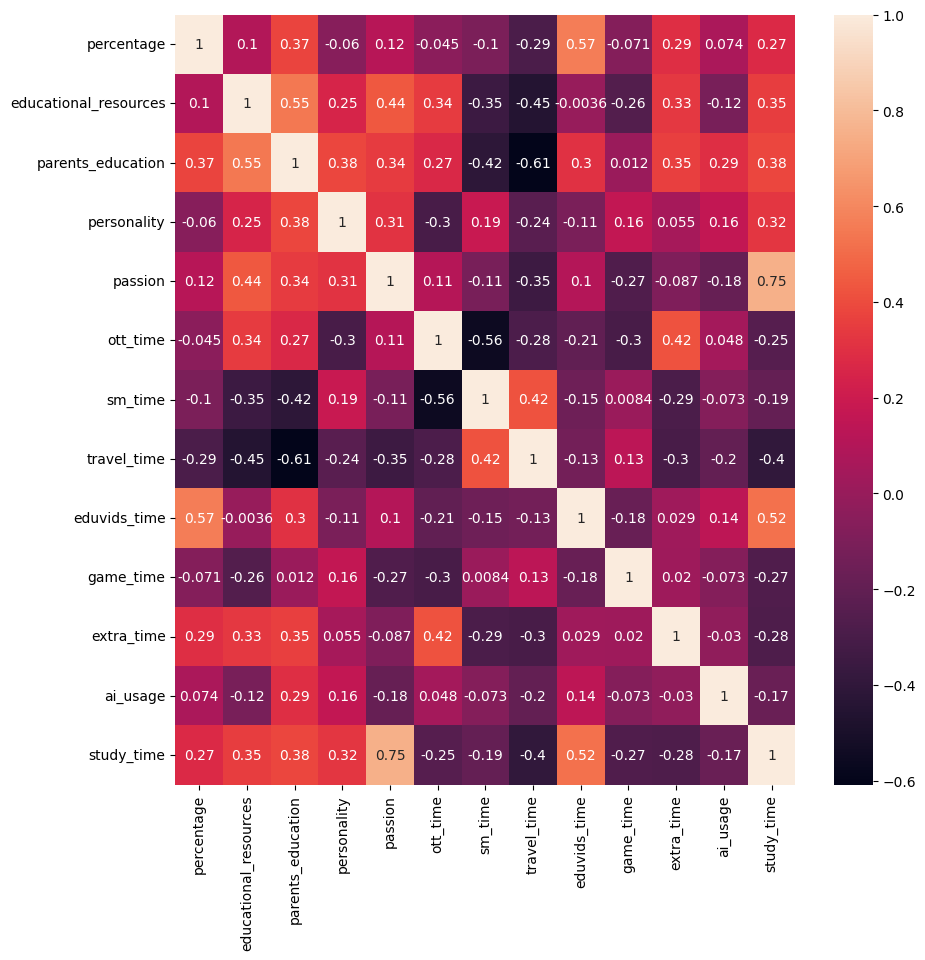

In [9]:

#regplot=regression plotting
plt.figure(figsize = (15, 6))
sns.regplot(x = 'study_time', y = 'percentage', data = df)
plt.show()

df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

df.columns

X=df.drop(columns=['percentage'])
y=df['percentage']

print(X)

print(y)

In [10]:
X.shape

y.shape

import numpy as np
#coverting in numpy array for ease to use
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

y = y.reshape(-1,1)

X
y.shape

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=10)

print(X_train.shape)
print(X_test.shape)

df

(599, 12)
(150, 12)


,percentage,educational_resources,parents_education,personality,passion,ott_time,sm_time,travel_time,eduvids_time,game_time,extra_time,ai_usage,study_time
0,85.0,1.00,0.65,0.01,1,2.0,1.0,0.5,3.0,1.0,2.0,0.01,8.14
1,78.0,0.50,0.50,0.50,0,1.5,1.5,1.0,2.5,1.5,1.0,0.50,5.00
2,92.0,0.01,0.75,1.00,1,3.0,0.5,0.3,2.0,0.5,3.0,1.00,5.45
3,87.0,1.00,0.65,0.01,0,2.0,1.0,0.8,2.5,1.0,2.0,0.50,4.36
4,80.0,0.50,0.50,0.50,1,2.5,1.0,0.5,2.0,1.0,1.0,0.01,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,78.0,0.50,0.65,1.00,1,2.5,1.5,1.0,2.5,1.0,1.0,0.50,7.15
745,89.0,1.00,0.65,0.01,1,3.0,0.7,0.5,2.5,0.8,2.0,0.01,7.14
746,85.5,1.00,0.50,1.00,1,2.0,1.2,0.3,2.0,0.2,2.5,0.01,8.28
747,78.0,0.50,0.20,0.01,0,2.5,0.8,1.2,2.5,1.0,1.0,0.50,4.21


In [11]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree model
model = DecisionTreeRegressor(random_state=10)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


In [12]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1.5003779289493575
R-squared: 0.9863925430822289
